In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import warnings
import pmdarima
import itertools
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
import statsmodels.stats.diagnostic as diag
from xgboost import XGBRegressor
from xgboost import plot_importance
from math import sqrt
from pylab import rcParams
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")
from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels as sm
import statsmodels.api as smt
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


In [2]:
# set parameter (font size etc) for plots

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
# pip install skforecast

# Data Pre-processing

In [3]:
# import data
df = pd.read_csv('unemprate_count.csv')

try:
    # Changing the date column to a Time Interval columnn
    df.date = pd.DatetimeIndex(df.date)
    # sort by date 
    df = df.sort_values(by = "date")
    # Change the index to the date column
    df.index = pd.PeriodIndex(df.date, freq='M')
except:
    pass

df['timeIndex'] = range(len(df))
df =df.rename(columns={"United States of America UnemploymentRate_Person": "unemployment_rate", "United States of America Count_Person_InLaborForce": "in_labor_force"})
df

,date,unemployment_rate,in_labor_force,timeIndex
date,,,,
1948-01,1948-01-01,3.4,60095000,0
1948-02,1948-02-01,3.8,60524000,1
1948-03,1948-03-01,4.0,60070000,2
1948-04,1948-04-01,3.9,60677000,3
1948-05,1948-05-01,3.5,59972000,4
...,...,...,...,...
2022-03,2022-03-01,3.6,164409000,890
2022-04,2022-04-01,3.6,164046000,891
2022-05,2022-05-01,3.6,164376000,892


In [4]:
df_sample = df[df.date.astype(str).str.contains('2020', case=False)]
df_sample.reset_index(drop=True)

,date,unemployment_rate,in_labor_force,timeIndex
0,2020-01-01,3.5,164479000,864
1,2020-02-01,3.5,164583000,865
2,2020-03-01,4.4,162764000,866
3,2020-04-01,14.7,156358000,867
4,2020-05-01,13.2,158122000,868
5,2020-06-01,11.0,159834000,869
6,2020-07-01,10.2,160015000,870
7,2020-08-01,8.4,160707000,871
8,2020-09-01,7.9,160153000,872
9,2020-10-01,6.9,160834000,873


In [6]:
# log transform unemployment rate
df['unemployment_rate_log'] = np.log(df.unemployment_rate)

In [9]:
# prepare dataset for checking seasonality
y = df.set_index('date')
y = y.drop(['timeIndex', 'unemployment_rate_log', 'in_labor_force'],  axis=1)
y

,unemployment_rate
date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-03-01,3.6
2022-04-01,3.6
2022-05-01,3.6


## Seasonality 

([<matplotlib.axis.XTick at 0x176115f30>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

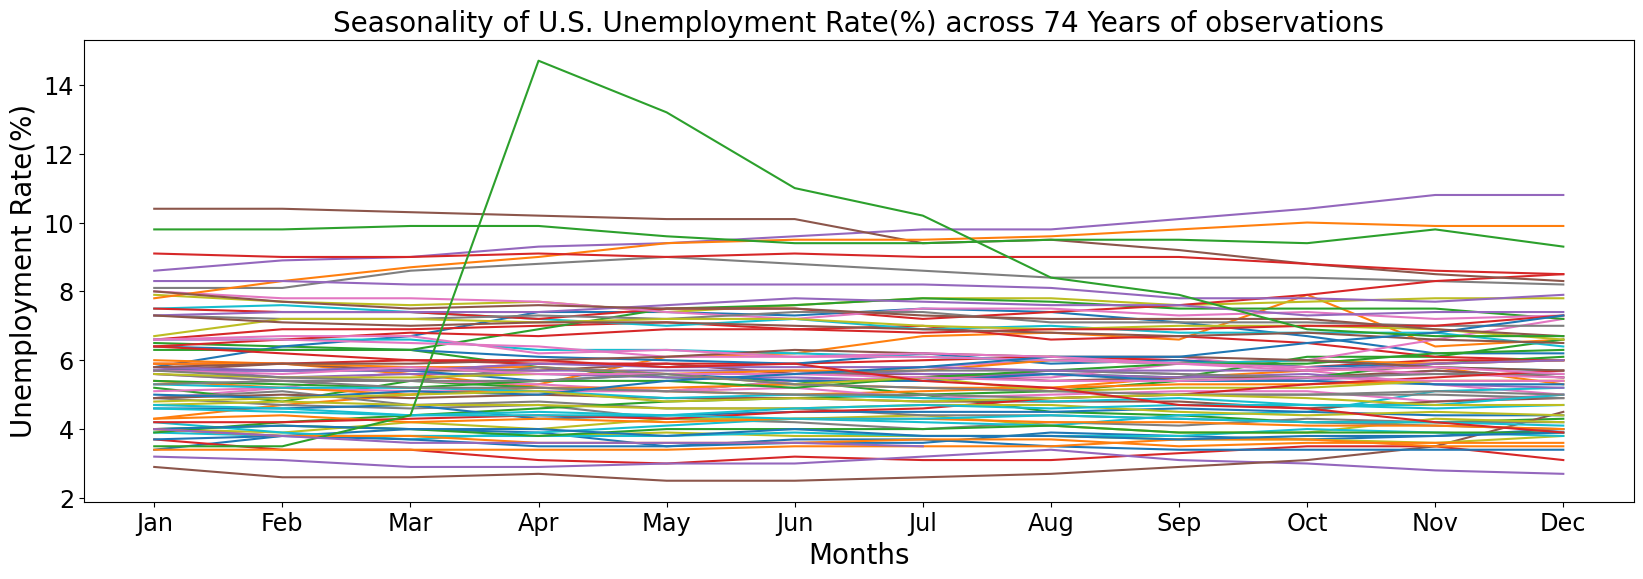

In [10]:
df.head()
df['month']=df.index.month
df['year']=df.index.year


pivot=df.pivot_table(values='unemployment_rate',index='month',columns='year')

pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.title('Seasonality of U.S. Unemployment Rate(%) across 74 Years of observations', fontsize=20)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Unemployment Rate(%)', fontsize = 20)
pyplot.xticks([ 1, 2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
       rotation=0)


Text(0, 0.5, 'Labor Force (100 Million of Person)')

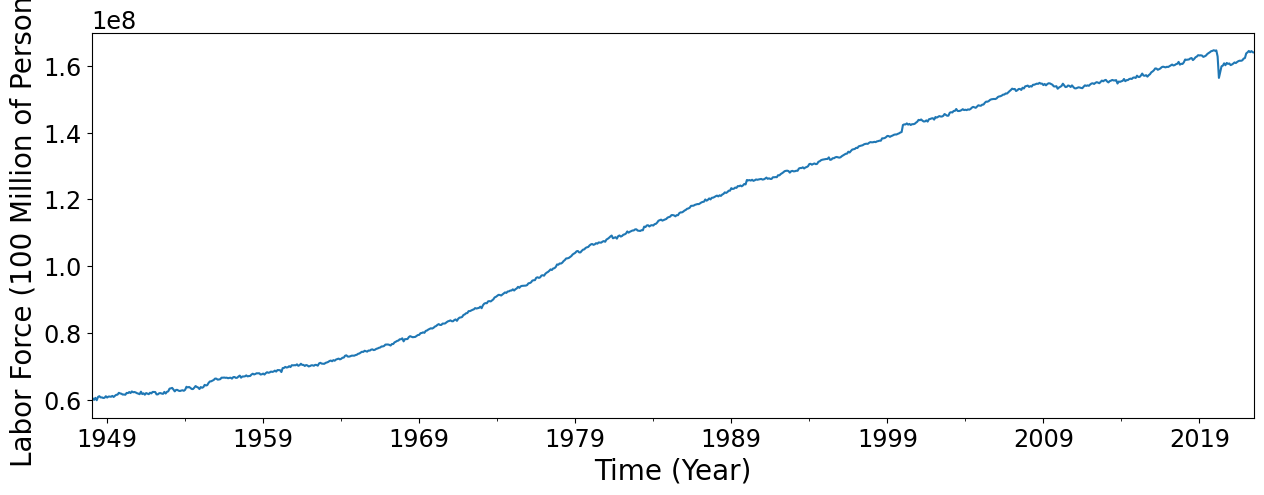

In [11]:
df.in_labor_force.plot()
plt.xlabel(r"Time (Year)", fontsize=20)
plt.ylabel(r"Labor Force (100 Million of Person)", fontsize=20)


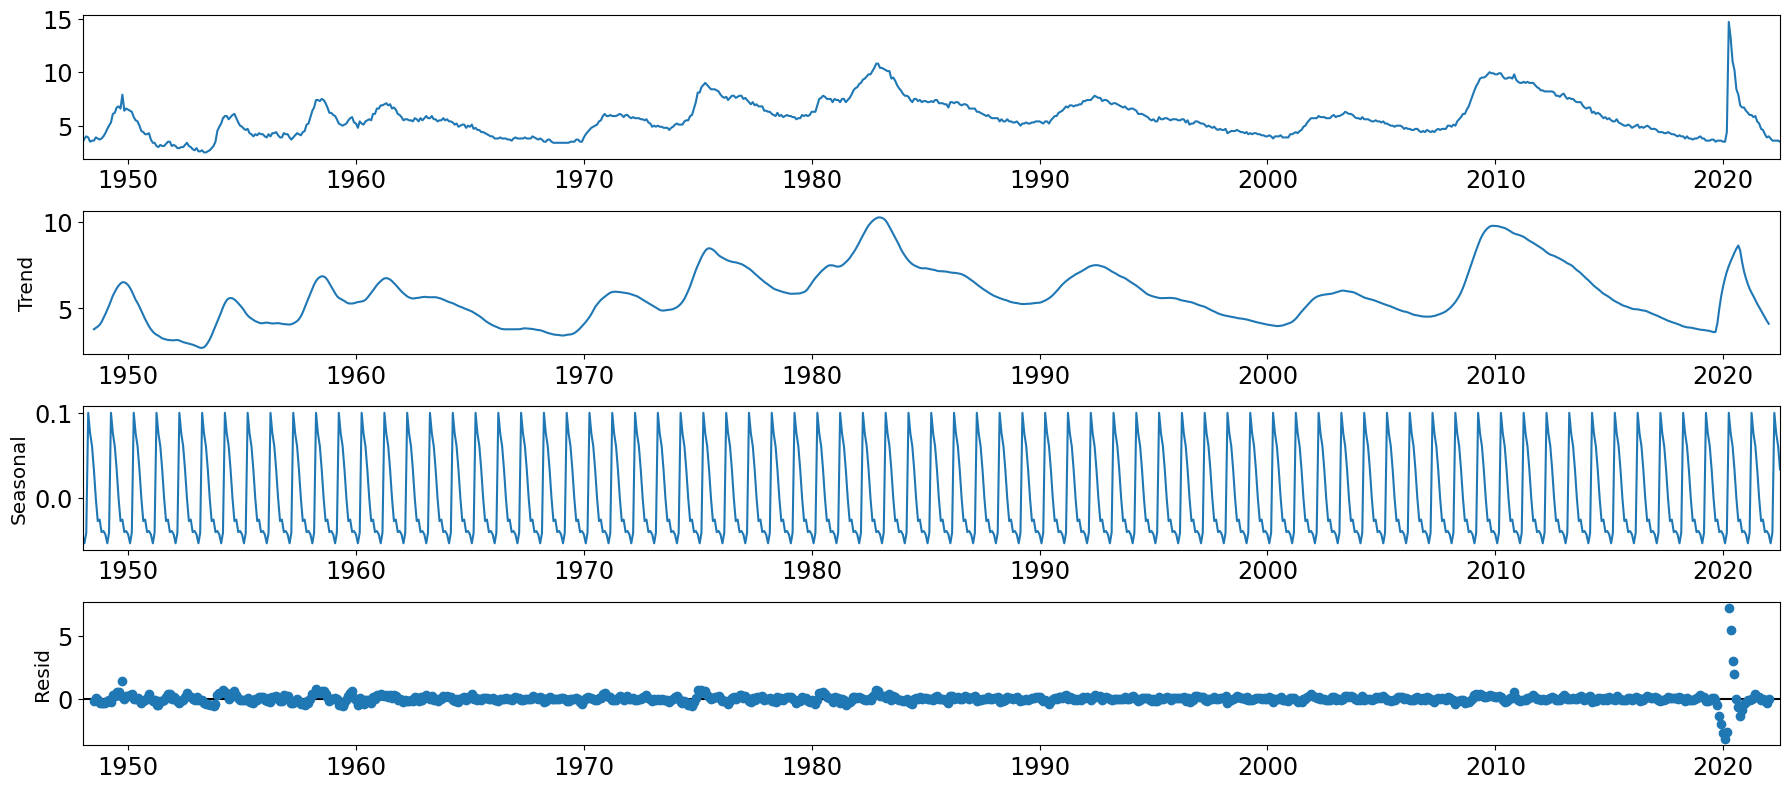

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


## Log Transformation & Differenciation

In [13]:
# y['unemp_logshift1'] = np.log(y['unemployment_rate']).shift()
# y['log_diff'] = np.log(y['unemployment_rate']) - y['unemp_logshift1']
df["unemp_logshift1"] = df.unemployment_rate_log.shift()
df["unemp_logdiff"] = df.unemployment_rate_log - df.unemp_logshift1
df['first_diff'] = df['unemployment_rate'].diff()
df['in_labor_force_log'] = np.log(df.in_labor_force)

Text(0, 0.5, 'unemployment rate (%)')

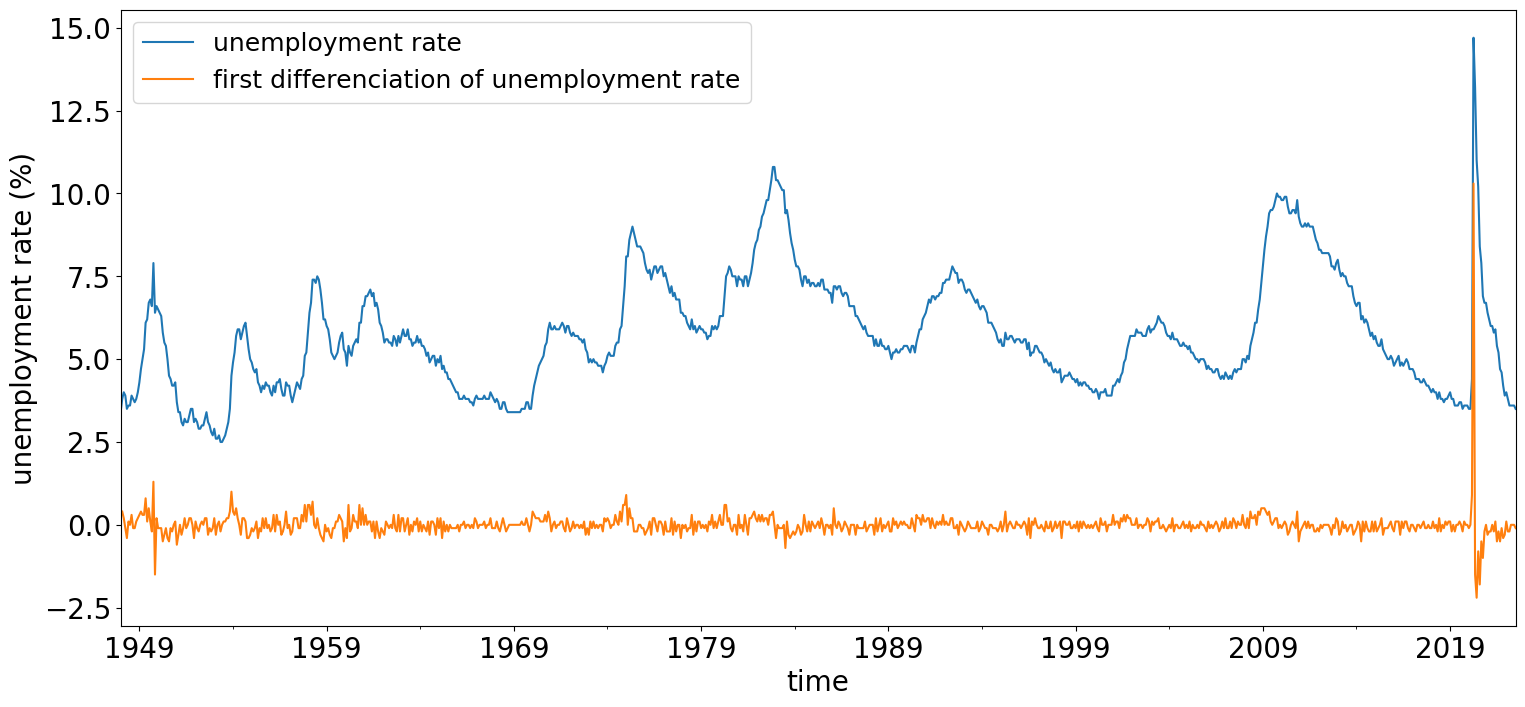

In [14]:
#remove seasonality

df.plot(kind="line", x="date", y = ["unemployment_rate",  "first_diff"], label= ['unemployment rate','first differenciation of unemployment rate'], fontsize=20
)

plt.legend(fontsize=18)
plt.xlabel(r"time", fontsize=20)
plt.ylabel(r"unemployment rate (%)", fontsize=20)


Text(0, 0.5, 'Frequency')

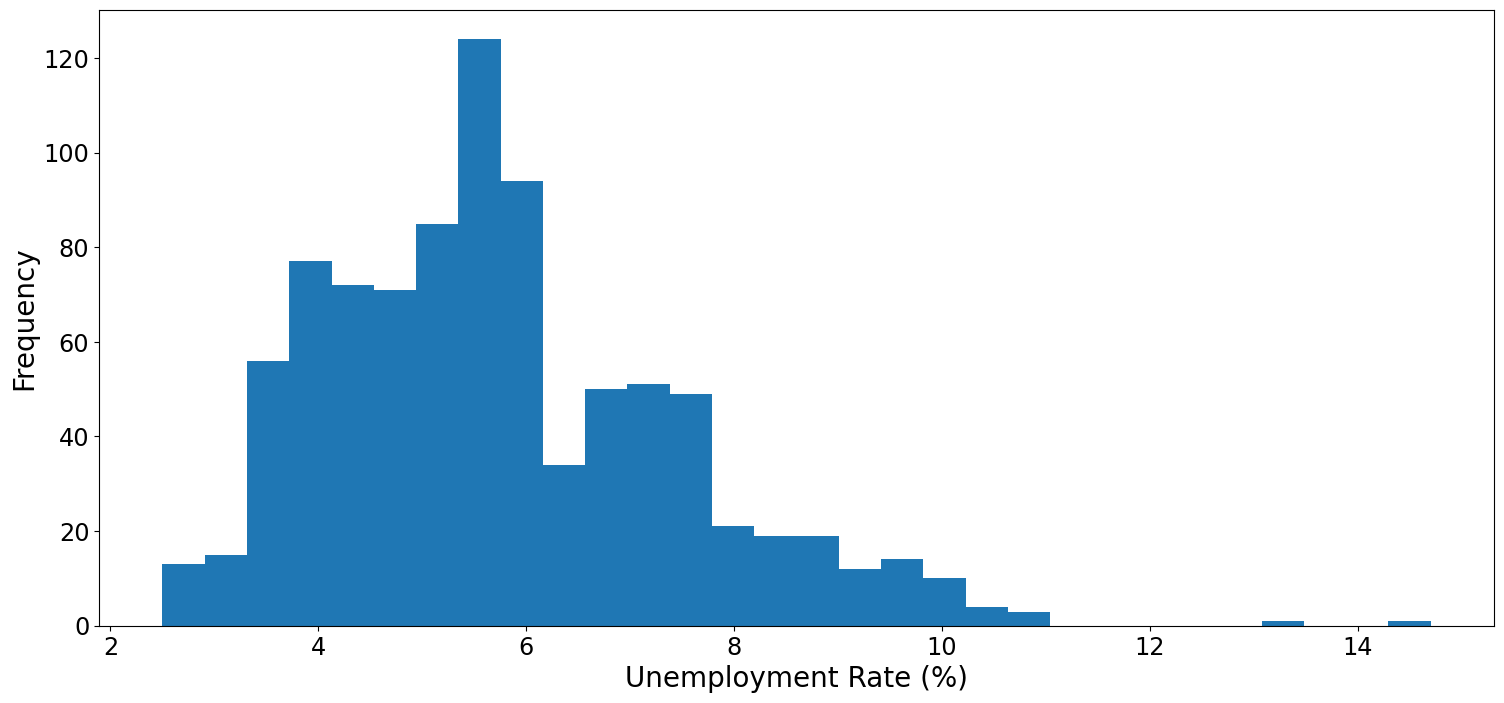

In [23]:
# original unemployment rate data distribution 

df.unemployment_rate.plot(kind = "hist", bins = 30)
plt.xlabel('Unemployment Rate (%)', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)


Text(0, 0.5, 'Frequency')

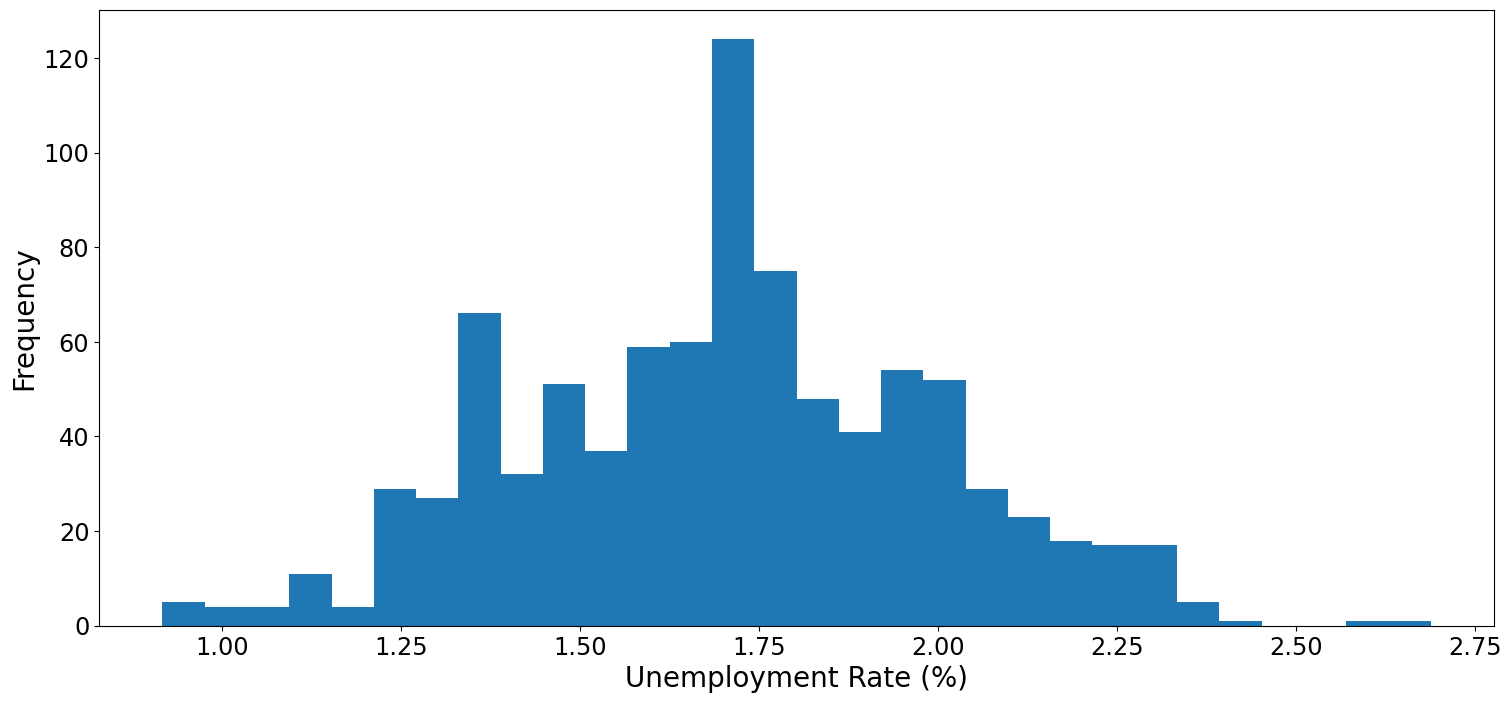

In [24]:
# distribution of log transformed unemployment rate 

df.unemployment_rate_log.plot(kind = "hist", bins = 30)
plt.xlabel('Unemployment Rate (%)', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)

## Check for Stationarity: ADF Test & KPSS Test

In [15]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [17]:
adf_test(df['unemployment_rate']) # check p-value

Results of Dickey-Fuller Test:
Test Statistic                  -3.878086
p-value                          0.002202
#Lags Used                       1.000000
Number of Observations Used    893.000000
Critical Value (1%)             -3.437694
Critical Value (5%)             -2.864782
Critical Value (10%)            -2.568496
dtype: float64


In [18]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )     
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [20]:
kpss_test(df["unemployment_rate"]) #since the p-value of Kpss test is 0.035, the time series is stable! 

Results of KPSS Test:
Test Statistic            0.526266
p-value                   0.035751
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


# Split into train and test datasets

In [21]:
X = df[['timeIndex']]
y = df['unemployment_rate_log']

In [23]:
# split the data into train, validation and test sests.

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, shuffle=False)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=False) 

print(x_train.shape, x_val.shape, x_test.shape)


(671, 1) (134, 1) (90, 1)


In [24]:
df_train = df.loc[y_train.index]
df_val = df.loc[y_val.index]
df_test = df.loc[y_test.index]


# Time Series Modeling

# Median Model

In [33]:
df

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,month,year,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log
date,,,,,,,,,,,
1948-01,1948-01-01,3.4,60095000,0,1.223775,1,1948,NaN,NaN,NaN,17.911437
1948-02,1948-02-01,3.8,60524000,1,1.335001,2,1948,1.223775,0.111226,0.4,17.918551
1948-03,1948-03-01,4.0,60070000,2,1.386294,3,1948,1.335001,0.051293,0.2,17.911021
1948-04,1948-04-01,3.9,60677000,3,1.360977,4,1948,1.386294,-0.025318,-0.1,17.921075
1948-05,1948-05-01,3.5,59972000,4,1.252763,5,1948,1.360977,-0.108214,-0.4,17.909388
...,...,...,...,...,...,...,...,...,...,...,...
2022-03,2022-03-01,3.6,164409000,890,1.280934,3,2022,1.335001,-0.054067,-0.2,18.917868
2022-04,2022-04-01,3.6,164046000,891,1.280934,4,2022,1.280934,0.000000,0.0,18.915657
2022-05,2022-05-01,3.6,164376000,892,1.280934,5,2022,1.280934,0.000000,0.0,18.917667


In [26]:
np.exp(y_test.median())

4.4

In [27]:
np.exp(y_test.mean())

4.7263801199544995

In [28]:
model_median_pred = np.exp(y_train.median())
df_test["unemp_rate_median"] = model_median_pred

In [29]:
model_mean_pred = np.exp(y_train.mean())
model_mean_pred

5.427917532315569

Text(0, 0.5, 'Unemployment Rate (%)')

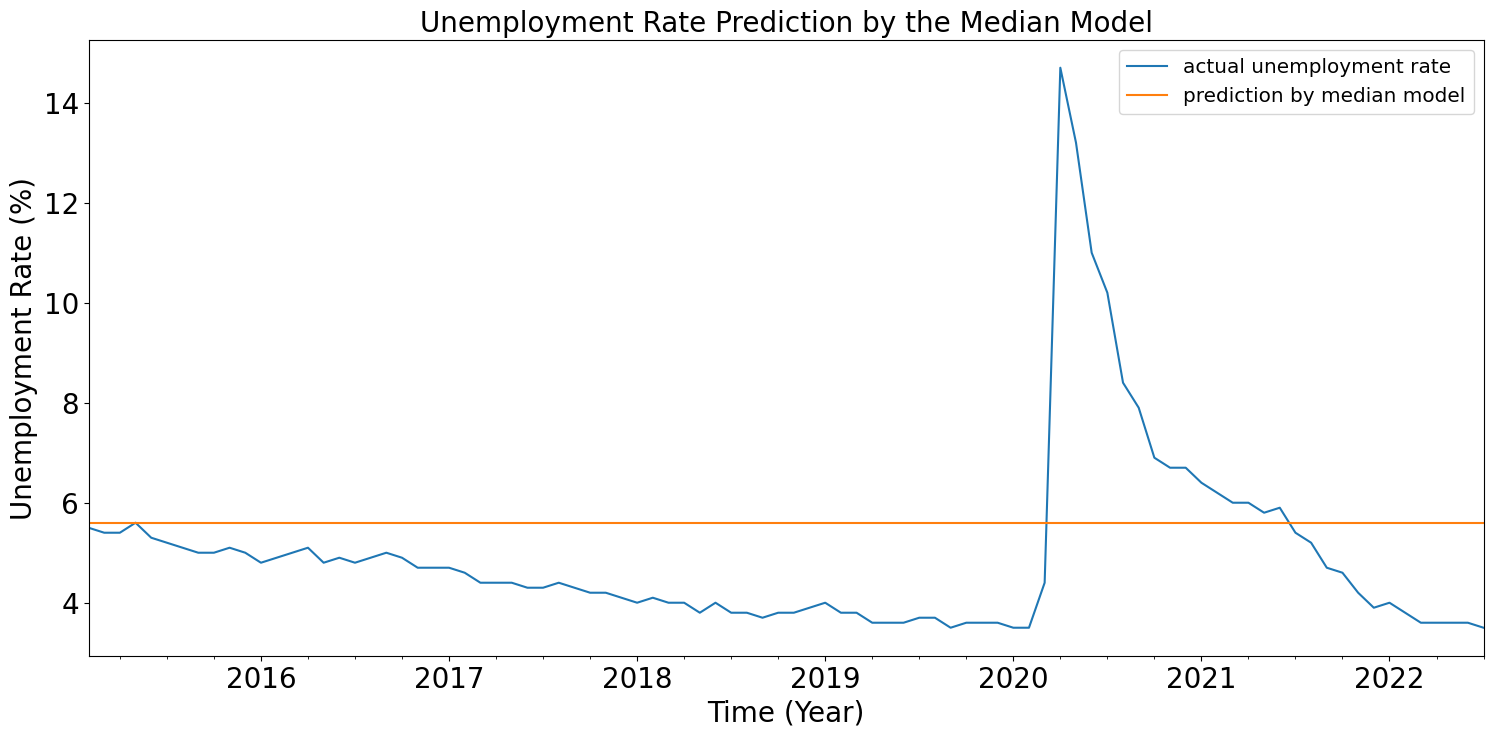

In [30]:
df_test.plot(kind="line", x="date", y = ["unemployment_rate", "unemp_rate_median"], label= ['actual unemployment rate','prediction by median model'], fontsize=20
)
plt.title("Unemployment Rate Prediction by the Median Model", fontsize =20)
plt.xlabel('Time (Year)', fontsize =20) 
plt.ylabel('Unemployment Rate (%)', fontsize =20 ) 
  

In [35]:
# evaluate RMSE

def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    #rmse = np.sqrt(mse.sum()/mse.count())
    rmse = np.sqrt(mse.sum()/len(mse))
    
    return rmse

In [36]:
model_median_RMSE = RMSE(df_test.unemployment_rate_log, y_train.median())
model_median_RMSE

0.3300453855344169

In [33]:
model_mean_RMSE = RMSE(df_test.unemployment_rate_log, y_train.mean())
model_mean_RMSE

0.31514577886066425

In [37]:
#results
dfResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])

dfResults.loc[0,"Model"] = "Median"
dfResults.loc[0,"Forecast"] = (model_median_pred)
dfResults.loc[0,"RMSE"] = model_median_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Median,5.6,0.330045


# Model 2: Linear Regression (Stats Model)

In [59]:
df_train['timeIndex'] = range(len(df_train))

In [70]:
model_linear = smf.ols('y_train ~ timeIndex', data = df_train).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     94.64
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           5.22e-21
Time:                        00:42:35   Log-Likelihood:                -50.254
No. Observations:                 671   AIC:                             104.5
Df Residuals:                     669   BIC:                             113.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5219      0.020     75.556      0.000       1.482       1.561
timeIndex      0.0005   5.21e-05      9.728      0.000       0.000       0.001
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.116
Skew:                          -0.041   Prob(JB):                       0.0173
Kurtosis:                       2.468   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_linear_forecast_auto = model_linear.predict(exog = dict(timeIndex=np.arange(805,895)))

model_linear_forecast_auto #use this for forecast 

0     1.929551
1     1.930058
2     1.930564
3     1.931070
4     1.931577
        ...   
85    1.972593
86    1.973100
87    1.973606
88    1.974112
89    1.974619
Length: 90, dtype: float64

In [71]:
#make forecast

model_linear_pred = model_linear.predict(x_test)

df_test["unemp_rate_linear"] = np.exp(model_linear_pred)

Text(0, 0.5, 'Unemployment Rate')

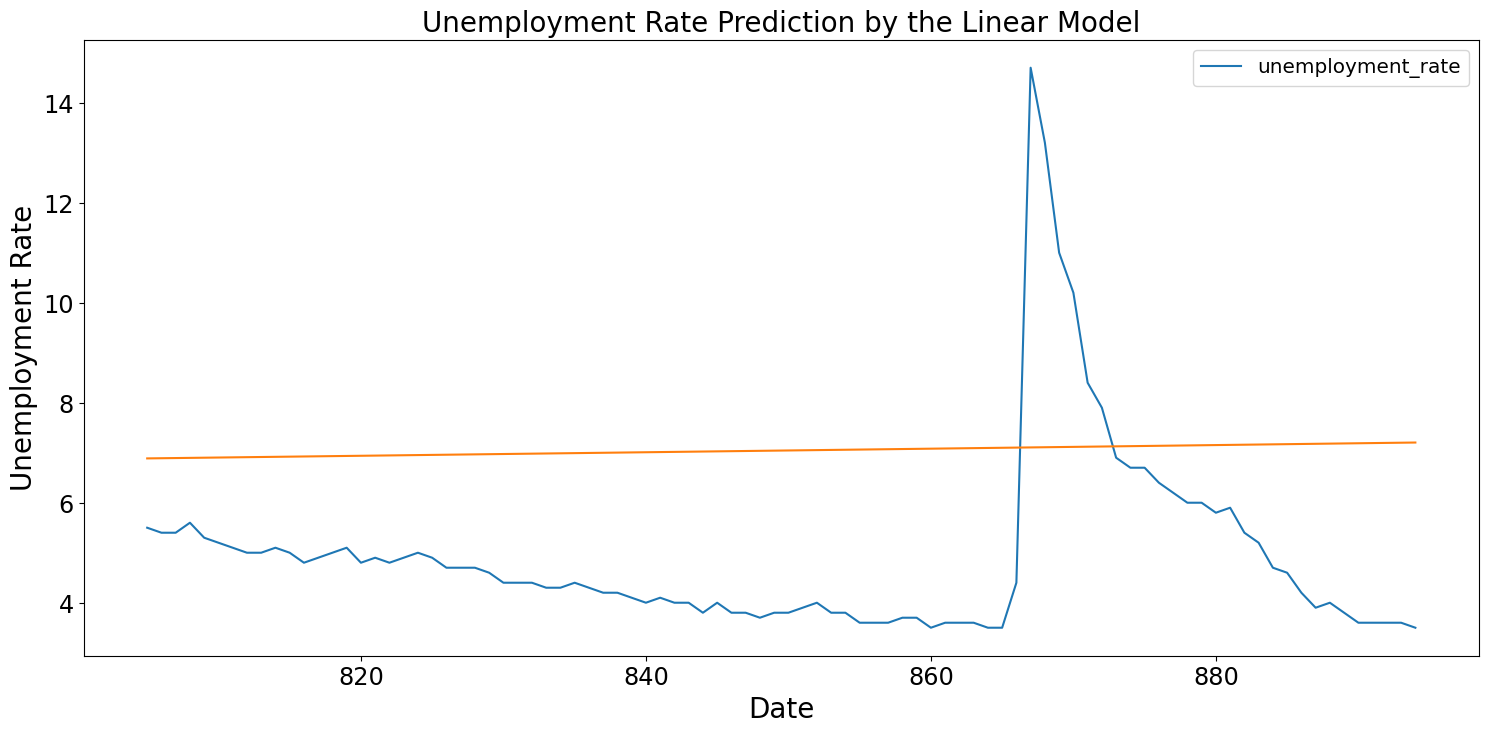

In [72]:
# Plot the prediction line
df_test.plot(kind="line", x ="timeIndex", y = "unemployment_rate")
plt.plot(df_test.timeIndex,np.exp(model_linear_pred), '-')
plt.title("Unemployment Rate Prediction by the Linear Model", fontsize =20)
plt.xlabel('Date', fontsize =20) 
plt.ylabel('Unemployment Rate', fontsize =20 ) 
  

In [73]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(model_linear_pred, y_test)
model_linear_RMSE




0.4891821389325731

In [75]:
#result

dfResults.loc[1,"Model"] = "Linear Model (StatsModel)"
dfResults.loc[1,"Forecast"] = np.exp(model_linear_forecast_auto[-10:]).mean()
dfResults.loc[1,"RMSE"] = model_linear_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182


Text(0, 0.5, 'Unemployment Rate')

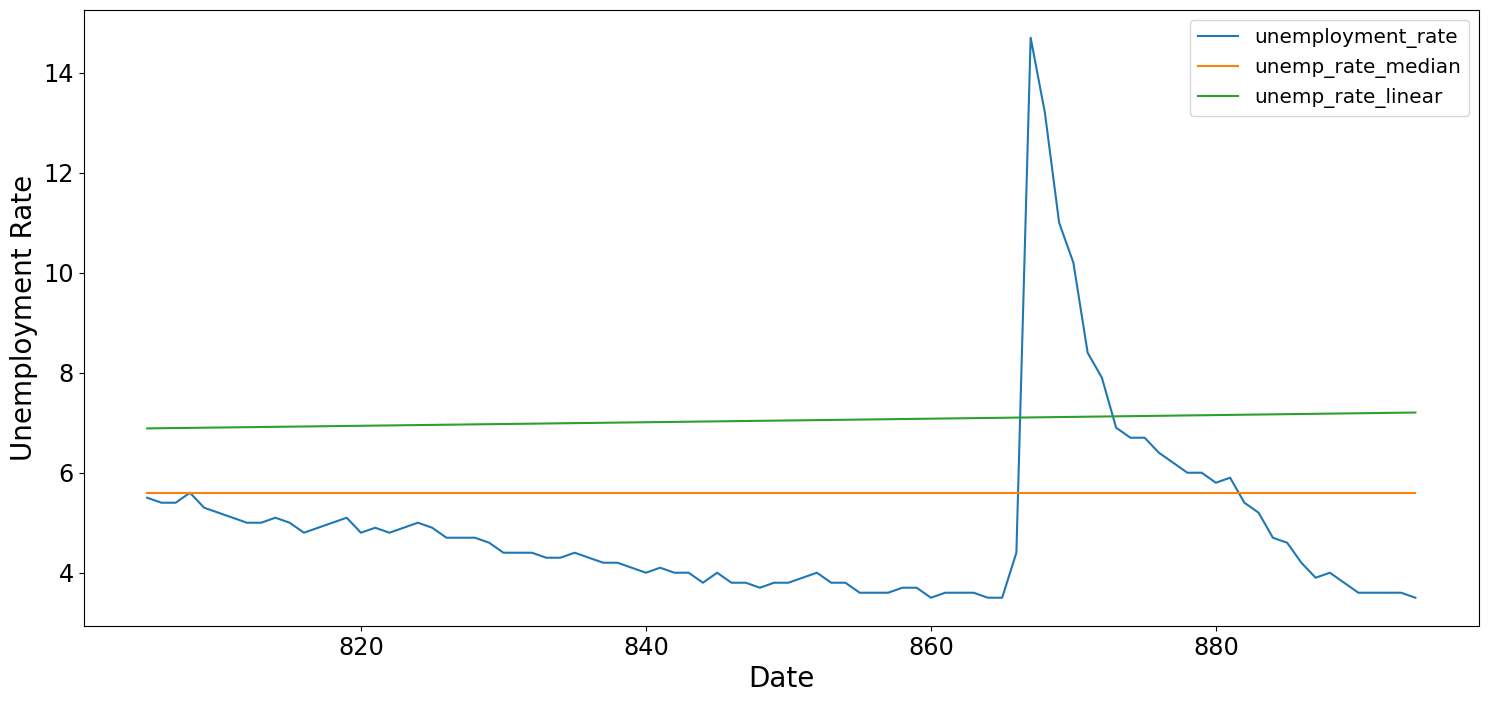

In [76]:
df_test.plot(kind="line", x="timeIndex", y = ["unemployment_rate", "unemp_rate_median", "unemp_rate_linear"])

plt.xlabel('Date', fontsize =20) 
plt.ylabel('Unemployment Rate', fontsize =20 ) 
  

## 2 b) Linear model using Scikit-Learn

In [77]:
clf = LinearRegression()

clf.fit(x_train.values.reshape(1, -1).T,y_train)


LinearRegression()

In [78]:
#prediction
prediction_lm = clf.predict(x_test)
test_lm = clf.predict(x_test.values.reshape(1, -1).T)

rmse_lm = RMSE(y_test, test_lm)

In [79]:
dfResults.loc[2,"Model"] = "Linear Model (Scikit-Learn)"
dfResults.loc[2,"Forecast"] = np.exp(prediction_lm[-10:]).mean()
dfResults.loc[2,"RMSE"] = rmse_lm

dfResults.head(12)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182


# Linear Model with Regressor

In [80]:
model_linear_laborforce = smf.ols('y_train ~ timeIndex + in_labor_force_log', data = df_train).fit()

In [81]:
model_linear_laborforce.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           6.20e-46
Time:                        00:43:16   Log-Likelihood:                 9.9189
No. Observations:                 671   AIC:                            -13.84
Df Residuals:                     668   BIC:                           -0.3115
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -57.8656      5.184    -11.162      0.000     -68.045     -47.686
timeIndex             -0.0045      0.000    -10.225      0.000      -0.005      -0.004
in_labor_force_log     3.3255      0.290     11.455      0.000       2.755       3.895
==============================================================================
Omnibus:                       11.404   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.752
Skew:                          -0.181   Prob(JB):                       0.0126
Kurtosis:                       2.573   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
rmse_reg2 = mean_squared_error(y_test, model_linear_laborforce.predict(df_test[['timeIndex','in_labor_force_log']]), squared=False)
rmse_reg2

0.4904807451505732

In [83]:
df_test["lm_with_regressor"] = np.exp(model_linear_laborforce.predict(
exog = dict(timeIndex=np.arange(805,895), in_labor_force_log=df_test['in_labor_force_log'].values))).values

In [84]:
dfResults.loc[3,"Model"] = "Multi-linear Model"
dfResults.loc[3,"Forecast"] = df_test["lm_with_regressor"][-10:].mean()
dfResults.loc[3,"RMSE"] = rmse_reg2

dfResults.head(13)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481


# Random Walk Model

In [85]:
df_train["unemp_logshift1"] =y_train.shift()
df_test["unemp_logshift1"] =y_test.shift()

Text(0, 0.5, 'unemployment rate')

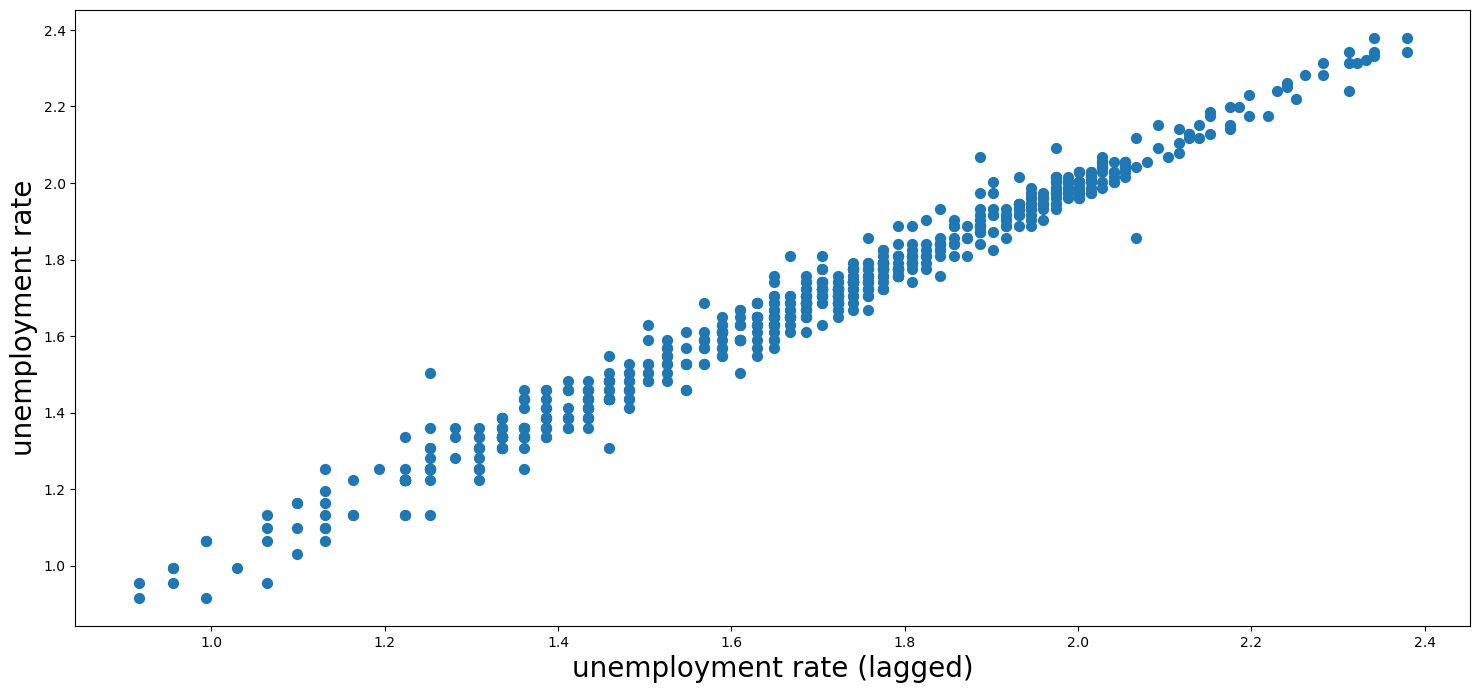

In [86]:
df_train.plot(kind= "scatter", y = "unemployment_rate_log", x = "unemp_logshift1", s = 50, fontsize=10)
#plt.figure().suptitle('Relationship between unemployment rate log and its lagged version', fontsize=20)
plt.xlabel('unemployment rate (lagged)', fontsize=20)
plt.ylabel('unemployment rate', fontsize=20)

In [87]:
df_train["first_diff"] = df_train.unemployment_rate_log.diff()
df_test["first_diff"] = df_test.unemployment_rate_log.diff()

df_train["first_diff"]

date
1948-01         NaN
1948-02    0.111226
1948-03    0.051293
1948-04   -0.025318
1948-05   -0.108214
             ...   
2003-07   -0.016000
2003-08   -0.016261
2003-09    0.000000
2003-10   -0.016529
2003-11   -0.033902
Freq: M, Name: first_diff, Length: 671, dtype: float64

In [88]:
# Lets plot the one-month difference curve
df_train["unemp_logdiff"] = df_train.unemployment_rate_log - df_train.unemp_logshift1
df_test["unemp_logdiff"] = df_test.unemployment_rate_log - df_test.unemp_logshift1

df_train["unemp_logdiff"]

date
1948-01         NaN
1948-02    0.111226
1948-03    0.051293
1948-04   -0.025318
1948-05   -0.108214
             ...   
2003-07   -0.016000
2003-08   -0.016261
2003-09    0.000000
2003-10   -0.016529
2003-11   -0.033902
Freq: M, Name: unemp_logdiff, Length: 671, dtype: float64

In [89]:
df_train["unemp_random_walk"] = np.exp(df_train.unemp_logshift1)
df_test["unemp_random_walk"] = np.exp(df_test.unemp_logshift1)

df_train.head()

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,month,year,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_random_walk
date,,,,,,,,,,,,
1948-01,1948-01-01,3.4,60095000,0,1.223775,1,1948,NaN,NaN,NaN,17.911437,NaN
1948-02,1948-02-01,3.8,60524000,1,1.335001,2,1948,1.223775,0.111226,0.111226,17.918551,3.4
1948-03,1948-03-01,4.0,60070000,2,1.386294,3,1948,1.335001,0.051293,0.051293,17.911021,3.8
1948-04,1948-04-01,3.9,60677000,3,1.360977,4,1948,1.386294,-0.025318,-0.025318,17.921075,4.0
1948-05,1948-05-01,3.5,59972000,4,1.252763,5,1948,1.360977,-0.108214,-0.108214,17.909388,3.9


Text(0, 0.5, 'unemployment Rate (%)')

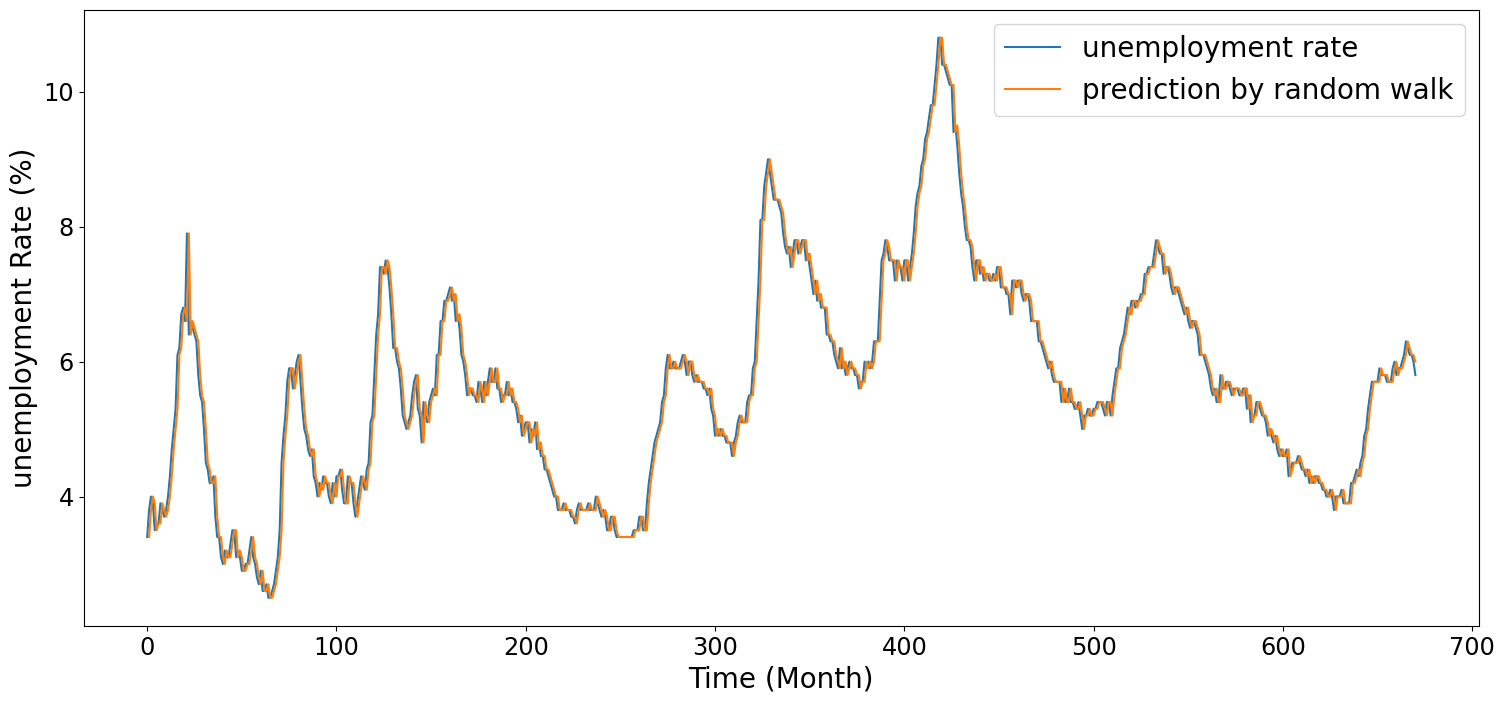

In [90]:
df_train.plot(kind="line", x="timeIndex", y = ["unemployment_rate","unemp_random_walk"], label=['unemployment rate', 'prediction by random walk'])
plt.xlabel('Time (Month)', fontsize=20)
plt.legend(fontsize=20)
plt.ylabel('unemployment Rate (%)', fontsize=20)

In [91]:
# Root Mean Squared Error (RMSE)
model_random_RMSE = RMSE(df_test.unemp_logshift1, y_test)
model_random_RMSE

0.13786036256970124

In [92]:
dfResults.loc[4,"Model"] = "Random Walk"
dfResults.loc[4,"Forecast"] = np.exp(df_test.unemp_logshift1)[-10:].mean()
dfResults.loc[4,"RMSE"] = model_random_RMSE
dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,Random Walk,3.96,0.13786


## Random Walk using ARIMA

In [93]:
start_index = y_test.index[0] 
end_index = y_test.index[-1]

In [94]:
# Random Walk using ARIMA model

model = sm.tsa.arima.ARIMA(y_train, order=(1, 0, 0))

model_fit = model.fit()
model_fit.summary()

predictions_rw = model_fit.predict()#start=start_index, end=end_index)
predictions_rw_test = model_fit.predict(start=start_index, end=end_index)


In [95]:
# Root Mean Squared Error (RMSE)
model_random_arima_RMSE = RMSE(predictions_rw_test, y_test)
model_random_arima_RMSE

0.3042032322398609

In [96]:
dfResults.loc[4,"Model"] = "Random Walk ARIMA(1,0,0)"
dfResults.loc[4,"Forecast"] = np.exp(predictions_rw_test[-10:]).mean()
dfResults.loc[4,"RMSE"] = model_random_arima_RMSE
dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203


# Moving Average 

In [97]:
# For smoothing the values we can use 12 month Moving Averages 
df_train['unemp_log_MA12'] = np.exp(df_train.unemployment_rate_log.rolling(12).mean())
df_test['unemp_log_MA12'] = df_test.unemployment_rate_log.rolling(12).mean()

df_train

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,month,year,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_random_walk,unemp_log_MA12
date,,,,,,,,,,,,,
1948-01,1948-01-01,3.4,60095000,0,1.223775,1,1948,NaN,NaN,NaN,17.911437,NaN,NaN
1948-02,1948-02-01,3.8,60524000,1,1.335001,2,1948,1.223775,0.111226,0.111226,17.918551,3.4,NaN
1948-03,1948-03-01,4.0,60070000,2,1.386294,3,1948,1.335001,0.051293,0.051293,17.911021,3.8,NaN
1948-04,1948-04-01,3.9,60677000,3,1.360977,4,1948,1.386294,-0.025318,-0.025318,17.921075,4.0,NaN
1948-05,1948-05-01,3.5,59972000,4,1.252763,5,1948,1.360977,-0.108214,-0.108214,17.909388,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-07,2003-07-01,6.2,146485000,666,1.824549,7,2003,1.840550,-0.016000,-0.016000,18.802434,6.3,5.930361
2003-08,2003-08-01,6.1,146445000,667,1.808289,8,2003,1.824549,-0.016261,-0.016261,18.802160,6.2,5.963973
2003-09,2003-09-01,6.1,146530000,668,1.808289,9,2003,1.808289,0.000000,0.000000,18.802741,6.1,5.997776


Text(0.5, 1.0, 'Unemployment Rate Prediction by Moving Average')

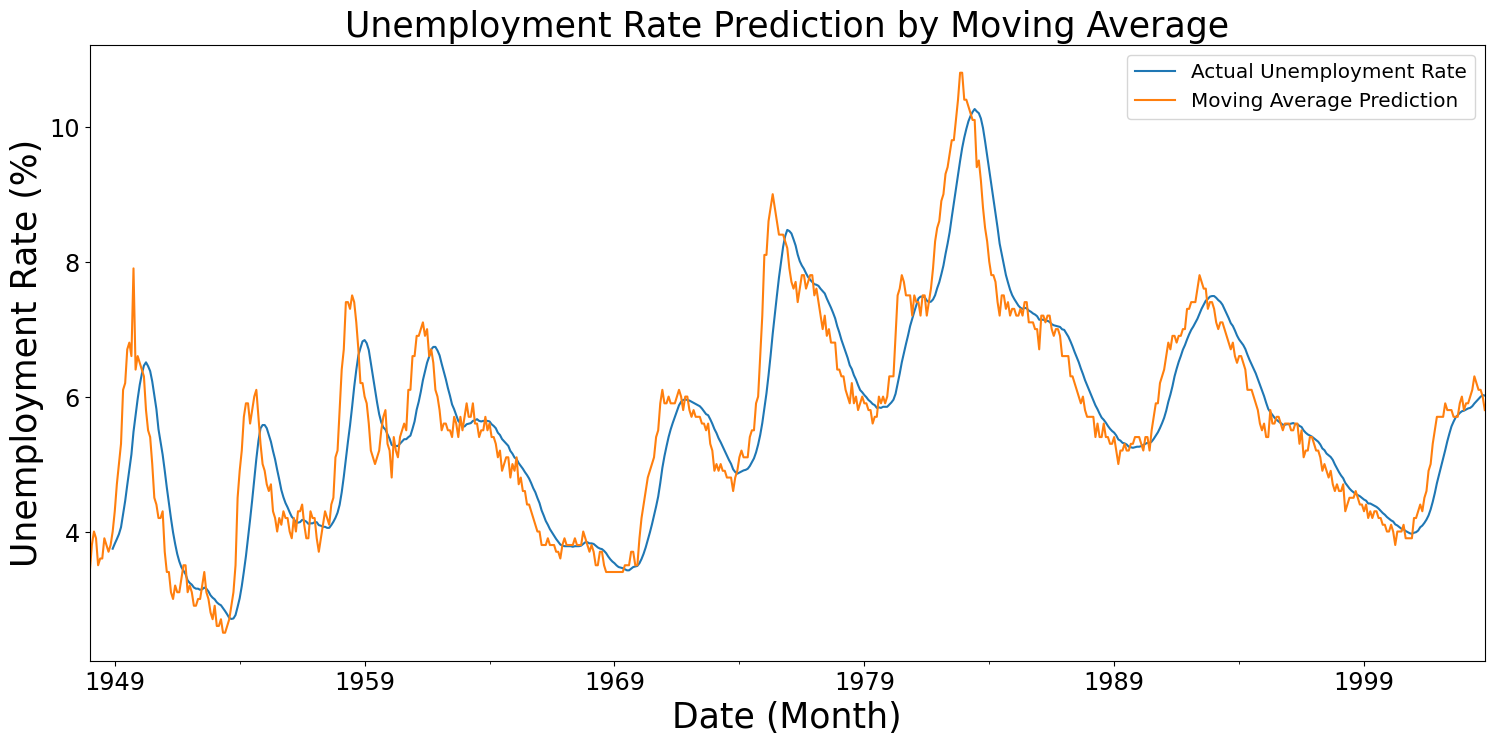

In [98]:
df_train.plot(kind ="line", y=["unemp_log_MA12", "unemployment_rate"] , label=['Actual Unemployment Rate', 'Moving Average Prediction'])
plt.xlabel('Date (Month)', fontsize=25)
plt.ylabel('Unemployment Rate (%)', fontsize=25)
plt.title('Unemployment Rate Prediction by Moving Average', fontsize=25)




In [99]:
df_test["unemp_MA12"] = np.exp(df_test.unemp_log_MA12)
df_test.tail()

,date,unemployment_rate,in_labor_force,timeIndex,unemployment_rate_log,month,year,unemp_logshift1,unemp_logdiff,first_diff,in_labor_force_log,unemp_rate_median,unemp_rate_linear,lm_with_regressor,unemp_random_walk,unemp_log_MA12,unemp_MA12
date,,,,,,,,,,,,,,,,,
2022-03,2022-03-01,3.6,164409000,890,1.280934,3,2022,1.335001,-0.054067,-0.054067,18.917868,5.6,7.189295,2.936209,3.8,1.544295,4.684666
2022-04,2022-04-01,3.6,164046000,891,1.280934,4,2022,1.280934,0.000000,0.000000,18.915657,5.6,7.192937,2.901740,3.6,1.501726,4.489431
2022-05,2022-05-01,3.6,164376000,892,1.280934,5,2022,1.280934,0.000000,0.000000,18.917667,5.6,7.196580,2.908202,3.6,1.461982,4.314503
2022-06,2022-06-01,3.6,164023000,893,1.280934,6,2022,1.280934,0.000000,0.000000,18.915517,5.6,7.200225,2.874640,3.6,1.420814,4.140490
2022-07,2022-07-01,3.5,163960000,894,1.252763,7,2022,1.280934,-0.028171,-0.028171,18.915133,5.6,7.203872,2.858199,3.6,1.384678,3.993539


In [100]:
#model_MA12_forecast = df_test.unemployment_rate_log.rolling(12).mean().tail(10).mean()
model_MA12_forecast = df_test['unemp_log_MA12'].tail(10).mean()

model_MA12_forecast

1.5657602829680266

In [101]:
# Root Mean Squared Error (RMSE)
model_MA12_RMSE = RMSE(np.log(df_test.unemp_MA12), y_test)
model_MA12_RMSE

0.23778253015024095

In [102]:
dfResults.loc[5,"Model"] = "Moving Average 12"
dfResults.loc[5,"Forecast"] = np.exp(model_MA12_forecast)
dfResults.loc[5,"RMSE"] = model_MA12_RMSE
dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
5,Moving Average 12,4.786313,0.237783


Text(0.5, 1.0, 'Unemployment Rate prediction by Different Models')

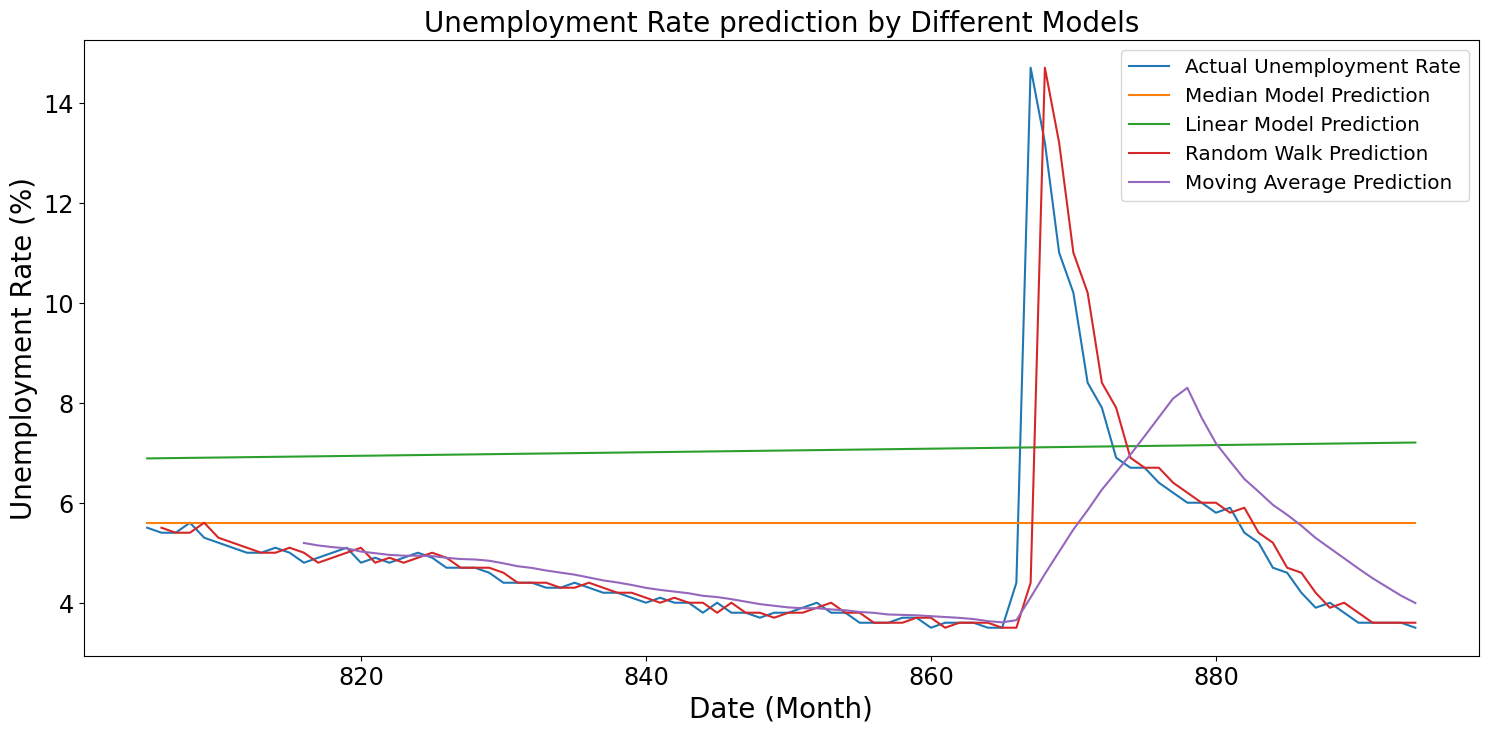

In [103]:
df_test.plot(kind="line", x="timeIndex", y = ["unemployment_rate", "unemp_rate_median", "unemp_rate_linear",
                                             "unemp_random_walk", "unemp_MA12"], label = ['Actual Unemployment Rate', 'Median Model Prediction', 'Linear Model Prediction', 'Random Walk Prediction', 'Moving Average Prediction'])
plt.xlabel('Date (Month)', fontsize=20)
plt.ylabel('Unemployment Rate (%)', fontsize=20)
plt.title('Unemployment Rate prediction by Different Models', fontsize=20)

# ARIMA

In [104]:
y_train
ts_logdiff = df_train.unemp_logdiff
ts_logdiff.dropna(inplace = True)
ts_logdiff_test = df_test.unemp_logdiff
ts_logdiff_test.dropna(inplace = True)

In [108]:
lag_acf = acf(ts_logdiff, nlags=40)

In [107]:
ACF = pd.Series(lag_acf)

<AxesSubplot: >

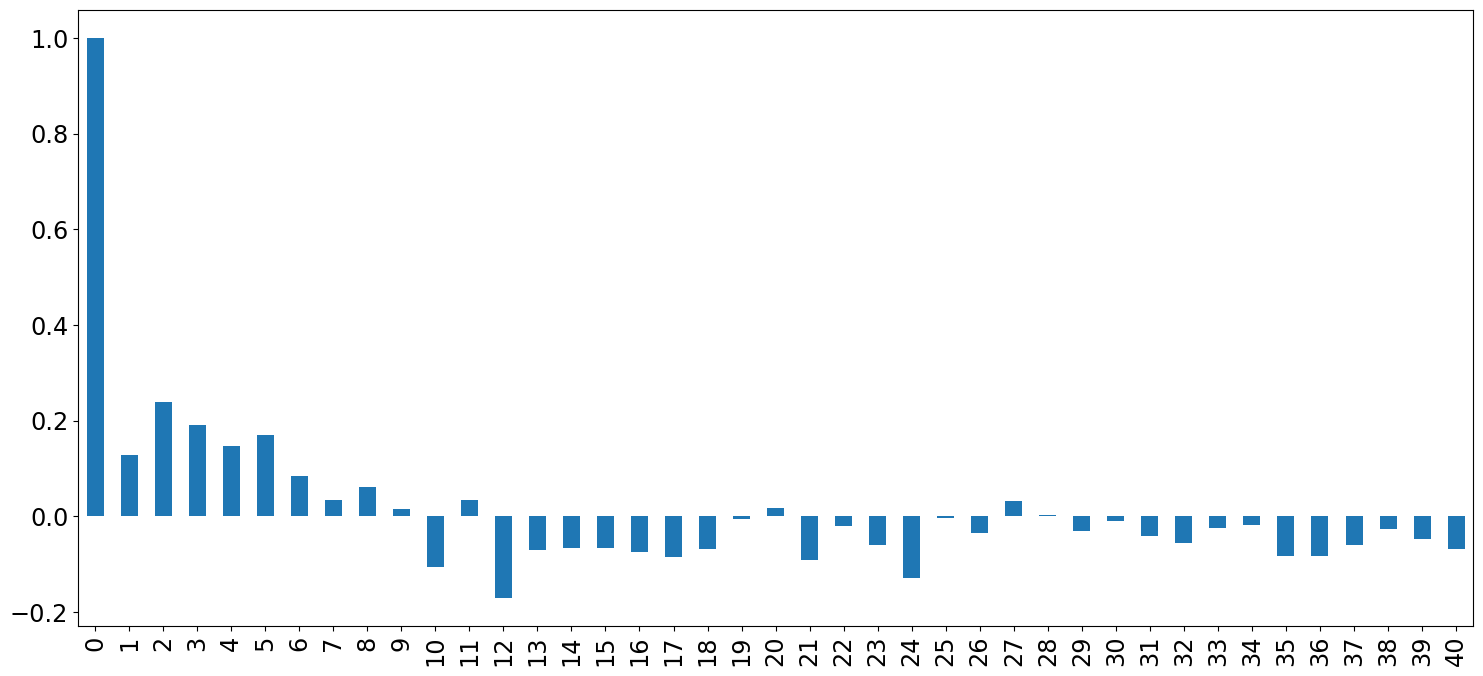

In [109]:
ACF.plot(kind = "bar")

In [110]:
lag_pacf = pacf(ts_logdiff, nlags=40, method='ols')

In [111]:
PACF = pd.Series(lag_pacf)

<AxesSubplot: >

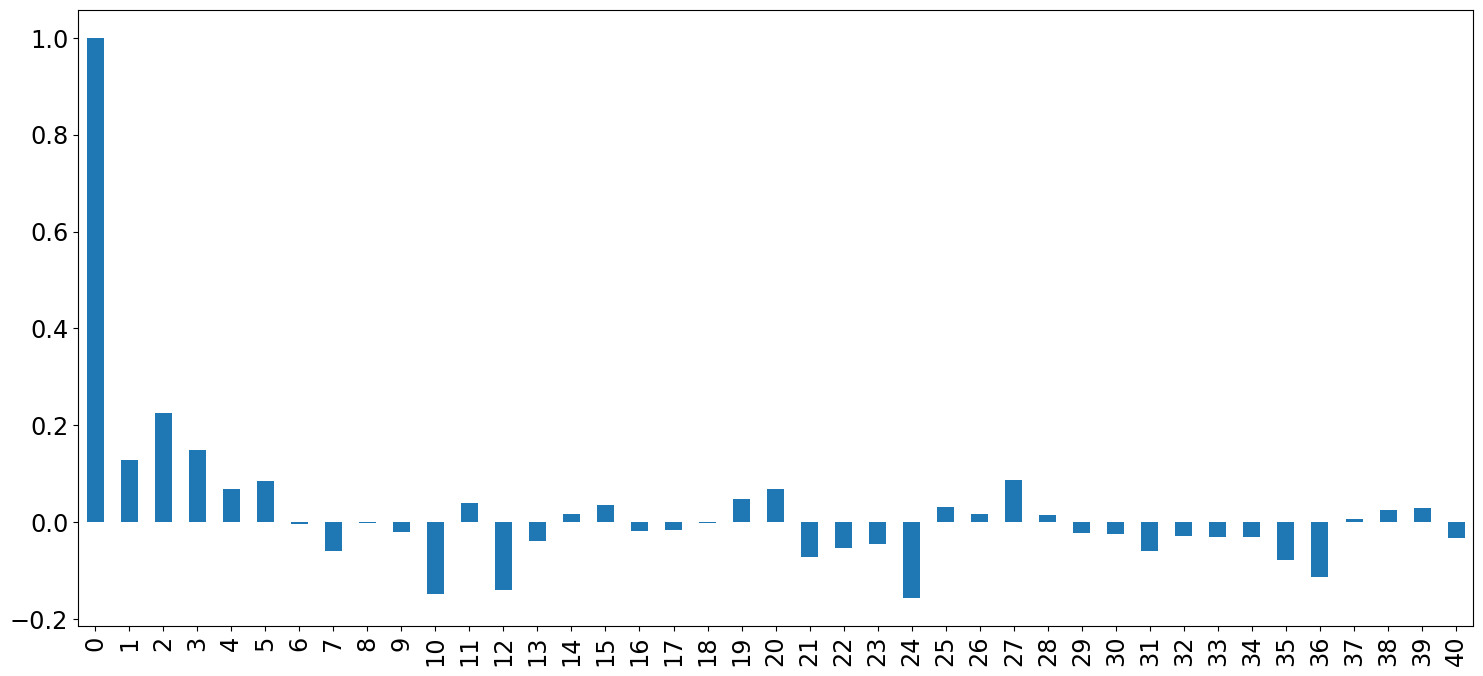

In [112]:
PACF.plot(kind = "bar")

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_data_properties(data, ts_plot_name="Time Series plot"):
    '''
    Summary:
    -------
    Plots various plots, including time series, autocorrelation,
    partial autocorrelation and distribution plots of data.
    
    Parameters:
    ----------
    ts_plot_name(String): The name of the time series plot
    data(pd.Dataframe, pd.Series, array): Time Series Data
    
    Returns:
    --------
    None
    
    '''
    plt.figure(figsize=(16,4))
    plt.plot(data)
    plt.title(ts_plot_name)
    plt.ylabel('unemployment_rate')
    plt.xlabel('date')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(data, ax=axes[0,0], lags=48);
    plot_pacf(data, ax=axes[0,1], lags=48);
    sns.distplot(data, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

In [115]:
def AIC_PDQS(df):
    '''
    Runs grid search to return lowest AIC result for permutations of pdq/s values in range 0,2

    df - Dataframe to analyze for best pdq/s permutation
    '''

    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 30)

    # Auto-Regressive (p) -> Number of autoregressive terms.
    # Integrated (d) -> Number of nonseasonal differences needed for stationarity.
    # Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    # Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,order=comb,seasonal_order=combs, enforce_stationarity=False,enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
                
    return ans



In [ ]:
ans = AIC_PDQS(ts_logdiff)

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79061D+00    |proj g|=  2.47800D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      7      1     0     0   6.384D-03  -1.791D+00
  F =  -1.7906316246206637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =-2397.4463769916892
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.79484D+00    |proj g|=  8.18270D+00

At iterate    5    f= -1.80985D+00    |proj g|=  6.88505D-02

At iterate   10    f= -1.81126D+00    |proj g|=  1.37231D+00

At iterate   15    f= -1.81240D+00    |proj g|=  4.40960D-03

At iterate   20    f= -1.81242D+00    |proj g|=  1.59505D-03

At iterate   25    f= -1.81242D+00    |proj g|=  5.80358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     43      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA (0, 0, 0) x (0, 0, 3, 12)12 : AIC Calculated =-2420.646031002295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.74520D+00    |proj g|=  1.48058D+01


 This problem is unconstrained.



At iterate    5    f= -1.78389D+00    |proj g|=  7.74354D-02

At iterate   10    f= -1.78488D+00    |proj g|=  1.48312D+00

At iterate   15    f= -1.78912D+00    |proj g|=  1.26622D-02

At iterate   20    f= -1.78917D+00    |proj g|=  1.74251D-01

At iterate   25    f= -1.78930D+00    |proj g|=  7.75783D-03

At iterate   30    f= -1.78931D+00    |proj g|=  1.71838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     37      1     0     0   5.542D-05  -1.789D+00
  F =  -1.7893113792110382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 4, 12)12 : AIC Calculated 

 This problem is unconstrained.



At iterate    5    f= -1.76135D+00    |proj g|=  1.11795D-01

At iterate   10    f= -1.76325D+00    |proj g|=  2.13225D+00

At iterate   15    f= -1.77378D+00    |proj g|=  3.55630D-02

At iterate   20    f= -1.77403D+00    |proj g|=  6.71687D-01

At iterate   25    f= -1.77464D+00    |proj g|=  9.14718D-03

At iterate   30    f= -1.77471D+00    |proj g|=  2.95451D-03

At iterate   35    f= -1.77472D+00    |proj g|=  8.21704D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     39      1     0     0   8.217D-05  -1.775D+00
  F =  -1.7747171570200679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.77836D+00    |proj g|=  2.45076D-01

At iterate   10    f= -1.78991D+00    |proj g|=  2.96261D+00

At iterate   15    f= -1.79410D+00    |proj g|=  3.13873D-02

At iterate   20    f= -1.79414D+00    |proj g|=  8.10523D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f= -1.79414D+00    |proj g|=  1.79004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     43      1     0     0   1.790D-04  -1.794D+00
  F =  -1.7941391645055806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 6, 12)12 : AIC Calculated =-2390.146480437478


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.74889D+00    |proj g|=  7.99050D+00

At iterate    5    f= -1.76176D+00    |proj g|=  1.49655D-01

At iterate   10    f= -1.76610D+00    |proj g|=  2.57745D+00

At iterate   15    f= -1.76978D+00    |proj g|=  2.75039D-02

At iterate   20    f= -1.77034D+00    |proj g|=  5.75920D-01

At iterate   25    f= -1.77059D+00    |proj g|=  1.40300D-01

At iterate   30    f= -1.77069D+00    |proj g|=  3.91781D-03

At iterate   35    f= -1.77070D+00    |proj g|=  2.89618D-02

At iterate   40    f= -1.77071D+00    |proj g|=  9.21580D-04

At iterate   45    f= -1.77071D+00    |proj g|=  3.13972D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f= -1.72351D+00    |proj g|=  1.63912D-01

At iterate   10    f= -1.73356D+00    |proj g|=  2.33634D+00

At iterate   15    f= -1.73555D+00    |proj g|=  1.49519D-01

At iterate   20    f= -1.73632D+00    |proj g|=  1.39925D-02

At iterate   25    f= -1.73635D+00    |proj g|=  4.72405D-03

At iterate   30    f= -1.73640D+00    |proj g|=  1.78327D-03

At iterate   35    f= -1.73641D+00    |proj g|=  1.32368D-03

At iterate   40    f= -1.73641D+00    |proj g|=  1.09777D-03

At iterate   45    f= -1.73641D+00    |proj g|=  1.34850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     57   

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65449D+00    |proj g|=  1.66531D+01

At iterate    5    f= -1.69604D+00    |proj g|=  8.42373D-02

At iterate   10    f= -1.69856D+00    |proj g|=  2.56642D+00

At iterate   15    f= -1.71648D+00    |proj g|=  1.42678D-01

At iterate   20    f= -1.71660D+00    |proj g|=  3.15782D-01

At iterate   25    f= -1.71819D+00    |proj g|=  6.83515D-01

At iterate   30    f= -1.71874D+00    |proj g|=  1.32937D-01

At iterate   35    f= -1.71882D+00    |proj g|=  1.26082D-02

At iterate   40    f= -1.71882D+00    |proj g|=  2.99161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint 

 This problem is unconstrained.



At iterate    5    f= -1.67922D+00    |proj g|=  1.12723D-01

At iterate   10    f= -1.68450D+00    |proj g|=  3.77578D+00

At iterate   15    f= -1.70498D+00    |proj g|=  4.98950D-02

At iterate   20    f= -1.70530D+00    |proj g|=  6.52249D-01

At iterate   25    f= -1.70783D+00    |proj g|=  2.81668D-01

At iterate   30    f= -1.70813D+00    |proj g|=  3.09546D-01

At iterate   35    f= -1.70893D+00    |proj g|=  1.83177D-01

At iterate   40    f= -1.70899D+00    |proj g|=  1.51247D-01

At iterate   45    f= -1.70903D+00    |proj g|=  2.93777D-02

At iterate   50    f= -1.70904D+00    |proj g|=  1.17992D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57871D+00    |proj g|=  1.85437D+01

At iterate    5    f= -1.62805D+00    |proj g|=  2.38031D-01

At iterate   10    f= -1.64708D+00    |proj g|=  4.70603D+00

At iterate   15    f= -1.67660D+00    |proj g|=  7.96967D-02

At iterate   20    f= -1.67768D+00    |proj g|=  6.64750D-01

At iterate   25    f= -1.67873D+00    |proj g|=  1.74428D-01

At iterate   30    f= -1.68038D+00    |proj g|=  1.38317D-02

At iterate   35    f= -1.68040D+00    |proj g|=  9.04802D-02

At iterate   40    f= -1.68044D+00    |proj g|=  1.63719D-03

At iterate   45    f= -1.68044D+00    |proj g|=  8.78626D-03

At iterate   50    f= -1.68044D+00    |proj g|=  8.25410D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58412D+00    |proj g|=  1.45713D+01

At iterate    5    f= -1.61627D+00    |proj g|=  1.16966D-01

At iterate   10    f= -1.62087D+00    |proj g|=  3.71341D+00

At iterate   15    f= -1.64475D+00    |proj g|=  2.95985D-01

At iterate   20    f= -1.64717D+00    |proj g|=  1.11654D+00

At iterate   25    f= -1.65021D+00    |proj g|=  5.43085D-01

At iterate   30    f= -1.65434D+00    |proj g|=  1.10615D-01

At iterate   35    f= -1.65711D+00    |proj g|=  1.35387D-01

At iterate   40    f= -1.65737D+00    |proj g|=  9.14732D-02

At iterate   45    f= -1.65753D+00    |proj g|=  7.84054D-02

At iterate   50    f= -1.65802D+00    |proj g|=  2.36908D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f= -1.50119D+00    |proj g|=  7.85404D-01

At iterate   10    f= -1.58576D+00    |proj g|=  5.32099D+00

At iterate   15    f= -1.60230D+00    |proj g|=  1.48538D+00

At iterate   20    f= -1.62470D+00    |proj g|=  6.90716D-02

At iterate   25    f= -1.63388D+00    |proj g|=  3.91217D-01

At iterate   30    f= -1.64877D+00    |proj g|=  5.34857D-01

At iterate   35    f= -1.65011D+00    |proj g|=  4.37284D-03

At iterate   40    f= -1.65021D+00    |proj g|=  1.80216D-02

At iterate   45    f= -1.65022D+00    |proj g|=  3.48513D-03

At iterate   50    f= -1.65022D+00    |proj g|=  2.81270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      2     52      2     0     0   1.213D+04   1.312D+01
  F =   13.118894205410651     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


ARIMA (0, 0, 0) x (0, 0, 14, 12)12 : AIC Calculated =17609.318235250274


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01586D+01    |proj g|=  1.24342D+01
  ys=-5.215E-05  -gs= 4.482E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.42563D+01    |proj g|=  4.25852D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   10    f=  1.40755D+01    |proj g|=  3.16785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     10     77      2     1     0   3.168D-03   1.408D+01
  F =   14.075505833356679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (0, 0, 15, 12)12 : AIC Calculated =18893.17781669795


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01661D+01    |proj g|=  2.54520D+01
  ys=-1.721E+02  -gs= 6.395E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17      2     31      2     1     0   6.876D+03   1.623D+01
  F =   16.230712991197702     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


ARIMA (0, 0, 0) x (0, 0, 16, 12)12 : AIC Calculated =21783.15540820492


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99260D+01    |proj g|=  6.74350D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      3     48      2     0     0   1.724D+05   1.173D+01
  F =   11.734661764697517     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (0, 0, 0) x (0, 0, 17, 12)12 : AIC Calculated =15760.446764694672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90033D+01    |proj g|=  5.41329D+05


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      5     92      3     0     0   1.418D+04   1.074D+01
  F =   10.737886411309423     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (0, 0, 0) x (0, 0, 18, 12)12 : AIC Calculated =14426.767791154627


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.34299D+00    |proj g|=  7.84801D+00

At iterate    5    f= -1.39949D+00    |proj g|=  9.15645D-01

At iterate   10    f= -1.42826D+00    |proj g|=  3.35473D+00

At iterate   15    f= -1.43173D+00    |proj g|=  1.07491D-01

At iterate   20    f= -1.43319D+00    |proj g|=  1.36087D+00

At iterate   25    f= -1.43537D+00    |proj g|=  1.23332D-01

At iterate   30    f= -1.43605D+00    |proj g|=  2.09615D-01

At iterate   35    f= -1.43616D+00    |proj g|=  1.73733D-01

At iterate   40    f= -1.43642D+00    |proj g|=  9.48455D-02

At iterate   45    f= -1.43643D+00    |proj g|=  5.07353D-02

At iterate   50    f= -1.43650D+00    |proj g|=  2.04040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30512D+00    |proj g|=  7.55014D+00

At iterate    5    f= -1.35866D+00    |proj g|=  1.03255D+00

At iterate   10    f= -1.39218D+00    |proj g|=  2.61883D+00

At iterate   15    f= -1.39499D+00    |proj g|=  7.45413D-01

At iterate   20    f= -1.39812D+00    |proj g|=  9.46090D-01

At iterate   25    f= -1.39890D+00    |proj g|=  2.91479D-01

At iterate   30    f= -1.40008D+00    |proj g|=  1.07899D-02

At iterate   35    f= -1.40042D+00    |proj g|=  6.26665D-03

At iterate   40    f= -1.40062D+00    |proj g|=  2.06926D-02

At iterate   45    f= -1.40066D+00    |proj g|=  1.03228D-02

At iterate   50    f= -1.40069D+00    |proj g|=  1.76489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.26915D+00    |proj g|=  7.34897D+00

At iterate    5    f= -1.32132D+00    |proj g|=  1.03275D+00

At iterate   10    f= -1.35692D+00    |proj g|=  2.39220D+00

At iterate   15    f= -1.36120D+00    |proj g|=  1.49051D+00

At iterate   20    f= -1.36370D+00    |proj g|=  1.28641D-01

At iterate   25    f= -1.36518D+00    |proj g|=  8.12662D-01

At iterate   30    f= -1.36558D+00    |proj g|=  2.58261D-02

At iterate   35    f= -1.36580D+00    |proj g|=  1.32284D-01

At iterate   40    f= -1.36591D+00    |proj g|=  4.99702D-03

At iterate   45    f= -1.36596D+00    |proj g|=  1.30193D-01

At iterate   50    f= -1.36600D+00    |proj g|=  1.84479D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23949D+00    |proj g|=  7.46521D+00

At iterate    5    f= -1.29579D+00    |proj g|=  7.32173D-01

At iterate   10    f= -1.32228D+00    |proj g|=  4.44610D+00

At iterate   15    f= -1.32937D+00    |proj g|=  1.15842D-01

At iterate   20    f= -1.33127D+00    |proj g|=  1.66305D+00

At iterate   25    f= -1.33547D+00    |proj g|=  9.25309D-02

At iterate   30    f= -1.33554D+00    |proj g|=  2.72942D-01

At iterate   35    f= -1.33727D+00    |proj g|=  8.07289D-01

At iterate   40    f= -1.33754D+00    |proj g|=  2.87949D-02

At iterate   45    f= -1.33796D+00    |proj g|=  2.84895D-02

At iterate   50    f= -1.33810D+00    |proj g|=  7.99318D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13130D+00    |proj g|=  6.85654D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07149D+00    |proj g|=  7.07630D+00


 This problem is unconstrained.


In [108]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
print(ans_df.loc[ans_df['aic'].idxmin()])

pdq         (1, 0, 1)
pdqs    (1, 0, 1, 12)
aic      -2465.998739
Name: 45, dtype: object


In [96]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(ts_logdiff, order=(1, 0, 1))

results_ARIMA = model.fit()

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(y_train.iloc[0], index=y_train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)


In [97]:
results_ARIMA_test = results_ARIMA.predict(start=start_index, end=end_index)
predictions_ARIMA_diff_test = pd.Series(results_ARIMA_test, copy=True)
predictions_ARIMA_diff_cumsum_test = predictions_ARIMA_diff_test.cumsum()
predictions_ARIMA_log_test = pd.Series(y_test.iloc[0], index=ts_logdiff_test.index)
predictions_ARIMA_log_test = predictions_ARIMA_log_test.add(predictions_ARIMA_diff_cumsum_test,fill_value=0)


In [98]:

df_train['unemp_ARIMA'] = np.exp(predictions_ARIMA_log)
df_train['unemp_ARIMA'] 


date
1948-01    3.400000
1948-02    3.403010
1948-03    3.483582
1948-04    3.571086
1948-05    3.617378
             ...   
2003-07    6.212816
2003-08    6.236197
2003-09    6.237814
2003-10    6.239793
2003-11    6.226324
Freq: M, Name: unemp_ARIMA, Length: 671, dtype: float64

In [99]:

model_ARIMA_RMSE = RMSE(predictions_ARIMA_log_test, y_test)


dfResults.loc[6,"Model"] = "ARMA / ARIMA (1,0,1)"
dfResults.loc[6,"Forecast"] = np.exp(predictions_ARIMA_log_test).tail(10).mean()
dfResults.loc[6,"RMSE"] = model_ARIMA_RMSE


dfResults.head(10)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
5,Moving Average 12,4.786313,0.237783
6,"ARMA / ARIMA (1,0,1)",5.932276,0.386579


In [100]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          unemp_logdiff   No. Observations:                  670
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1224.169
Date:                Sun, 06 Nov 2022   AIC                          -2440.339
Time:                        22:19:12   BIC                          -2422.310
Sample:                    02-29-1948   HQIC                         -2433.355
                         - 11-30-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.003      0.289      0.773      -0.005       0.007
ar.L1          0.8442      0.044     19.149      0.000       0.758       0.931
ma.L1         -0.6918      0.059    -11.779      0.0

# Grid Search

In [104]:
from sklearn.model_selection import PredefinedSplit, train_test_split, GridSearchCV

# Create a list where train data indices are -1 and validation data indices are 0
"""
split_index = []
for x in x_trainval.index:
    if x in x_train.index:
        split_index.append(-1)
    else:
        split_index.append(0)
"""        

# Use the list to create PredefinedSplit
x_trainval = pd.concat([x_train, x_val])
y_trainval = pd.concat([y_train, y_val])


split_index = [-1 if x in x_train.index else 0 for x in x_trainval.index]


pds = PredefinedSplit(test_fold = split_index)



# SVM

In [105]:
svm = SVR()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  

grid = GridSearchCV(SVR(), param_grid, cv=pds)
grid.fit(x_trainval.values.reshape(1,-1).T, y_trainval)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [106]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.0001}
SVR(C=0.1, gamma=0.0001)


In [107]:
svm = SVR(C=0.1, gamma=0.0001)

#Sy_pred = 
svm.fit(x_train.values.reshape(1,-1).T, y_train)#.predict(y_train)


SVR(C=0.1, gamma=0.0001)

In [108]:
Sy_pred = svm.predict(x_test.values.reshape(1,-1).T)

In [109]:
model_SVM_RMSE = RMSE(Sy_pred, y_test)
print(model_SVM_RMSE)

0.3426828849307051


In [111]:
dfResults.loc[7,"Model"] = "SVM"
dfResults.loc[7,"Forecast"] = np.exp(svm.predict(x_test)[-10:].mean())
dfResults.loc[7,"RMSE"] = model_SVM_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
5,Moving Average 12,4.786313,0.237783
6,"ARMA / ARIMA (1,0,1)",5.932276,0.386579
8,SVM,5.560939,0.342683
7,SVM,5.560939,0.342683


## Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor


para_grids = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['squared_error']
}

#grid = GridSearchCV(RandomForestRegressor(), para_grids, refit = True, verbose = 3)
grid = GridSearchCV(RandomForestRegressor(), para_grids, cv=pds)

  
# fitting the model for grid search
#grid.fit(x_train.values.reshape(1,-1).T, y_train)
grid.fit(x_trainval.values.reshape(1,-1).T, y_trainval)



GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [114]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 10}
RandomForestRegressor(max_features='sqrt', n_estimators=10)


In [115]:
rf = RandomForestRegressor(max_features='auto', n_estimators=10)


# rf = RandomForestRegressor(n_estimators=1200,
#                           max_depth=15,
#                           min_samples_split=5,
#                           min_samples_leaf=5,
#                           max_features=None,
#                           oob_score=True,
#                           random_state=42)

rf.fit(x_train.values.reshape(1,-1).T, y_train)#.predict(y_train)

#rf_pred=rf_model.predict(x_test)
rf_pred = rf.predict(x_test.values.reshape(1,-1).T)
rf_pred_val = rf.predict(x_val.values.reshape(1,-1).T)


In [116]:
RF_RMSE = RMSE(rf_pred, y_test)
RF_RMSE

0.35744034072181546

In [117]:
RF_RMSE_val = RMSE(rf_pred_val, y_val)
RF_RMSE_val

0.2917027050313539

In [118]:
dfResults.loc[8,"Model"] = "Random Forest"
dfResults.loc[8,"Forecast"] = np.exp(rf.predict(x_test)[-10:]).mean()
dfResults.loc[8,"RMSE"] = RF_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
5,Moving Average 12,4.786313,0.237783
6,"ARMA / ARIMA (1,0,1)",5.932276,0.386579
8,Random Forest,5.878692,0.35744
7,SVM,5.560939,0.342683


# XGBoost

In [119]:
parameters = { "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] ,
"n_estimators":[10, 20, 30, 50,100,150]}

In [120]:
#grid = GridSearchCV(XGBRegressor(), parameters, refit = True, verbose = 3)
grid = GridSearchCV(XGBRegressor(), parameters, cv=pds)


# fitting the model for grid search
#grid.fit(x_train.values.reshape(1,-1).T, y_train)
grid.fit(x_trainval.values.reshape(1,-1).T, y_trainval)



GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constrai...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [10, 20, 30, 50, 100, 150]})

In [121]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.3, 'n_estimators': 30}
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [122]:
xgb = XGBRegressor( learning_rate= 0.3, n_estimators= 30)

In [574]:
#xgb=XGBRegressor(n_estimators=1000,max_depth=8,learning_rate=0.1, reg_lambda=0,subsample=0.8, predictor = 'auto')

In [419]:
#model_xg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)],early_stopping_rounds=50,verbose=False)

In [123]:
xgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_val,y_val)],early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [124]:
xgb_pred = xgb.predict(x_train.values.reshape(1,-1).T)
xgb_pred_test = xgb.predict(x_test.values.reshape(1,-1).T)
xgb_pred_val = xgb.predict(x_val.values.reshape(1,-1).T)


In [125]:
XGB_RMSE_val = RMSE(xgb_pred_val, y_val)
XGB_RMSE_val

0.29287237957743883

In [126]:
XGB_RMSE = RMSE(xgb_pred_test, y_test)
XGB_RMSE

0.35558145304846683

In [127]:
dfResults.loc[8,"Model"] = "XGBoost"
dfResults.loc[8,"Forecast"] = np.exp(xgb_pred_test[-10:]).mean()
dfResults.loc[8,"RMSE"] = XGB_RMSE
dfResults.head(15)

,Model,Forecast,RMSE
0,Median,5.6,0.330045
1,Linear Model (StatsModel),7.187483,0.489182
2,Linear Model (Scikit-Learn),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
5,Moving Average 12,4.786313,0.237783
6,"ARMA / ARIMA (1,0,1)",5.932276,0.386579
8,XGBoost,5.860736,0.355581
7,SVM,5.560939,0.342683


In [128]:
dfResults.sort_values(by=['RMSE'])

,Model,Forecast,RMSE
5,Moving Average 12,4.786313,0.237783
4,"Random Walk ARIMA(1,0,0)",5.256429,0.304203
0,Median,5.6,0.330045
7,SVM,5.560939,0.342683
8,XGBoost,5.860736,0.355581
6,"ARMA / ARIMA (1,0,1)",5.932276,0.386579
2,Linear Model (Scikit-Learn),7.187483,0.489182
1,Linear Model (StatsModel),7.187483,0.489182
3,Multi-linear Model,2.886225,0.490481
